# CODE
This code implements cluster analysis using different clustering algorithms and evaluates their performance using metrics like Davies-Bouldin Score and Silhouette Score. The algorithms used include KMeans Clustering, Affinity Propagation Clustering, Mean Shift Clustering, Agglomerative Clustering, Spectral Clustering, OPTICS Clustering, Gaussian Clustering (GaussianMixture), and BIRCH Clustering. Additionally, an ensemble approach is used to combine the results of two clustering algorithms for improved performance.

Prerequisites:
Ensure that the required libraries are installed before running the code:
numpy
pandas
seaborn
matplotlib
scikit-learn
scipy
dask
yellowbrick


Data Preparation:
    
The code expects a CSV file named 'weatherHistory.csv', containing the dataset for clustering analysis.

The dataset should have columns 'Summary', 'Precip Type', and 'Humidity'.

The columns 'Formatted Date' and 'Daily Summary' are dropped as they are not used for clustering.

Data is split into training (96%) and testing (4%) datasets to evaluate the performance of clustering algorithms.

Label encoding is applied to the 'Summary' and 'Precip Type' columns.

Data cleaning is performed to remove rows with missing values and outliers.



Clustering Algorithm Evaluation
KMeans Clustering: The code uses the Elbow method to determine the optimal number of clusters (K) and calculates the Davies-Bouldin and Silhouette Scores for K=2 to K=10.

Affinity Propagation Clustering, Mean Shift Clustering, Agglomerative Clustering, Spectral Clustering, OPTICS Clustering, Gaussian Clustering, and BIRCH Clustering: Each algorithm is applied to the dataset, and the Davies-Bouldin and Silhouette Scores are calculated.

Ensemble Clustering: An ensemble of Mean Shift Clustering and BIRCH Clustering is created by combining their clustering results. The Davies-Bouldin and Silhouette Scores for the ensemble approach are computed.

Usage
Make sure the 'weatherHistory.csv' file containing the dataset is available in the working directory.

Install the required libraries mentioned in the prerequisites section.

Copy and paste the provided code into a Python script or a Jupyter Notebook.

Run the code to execute the cluster analysis and obtain the clustering results and evaluation metrics.




Interpretation of Results
The Davies-Bouldin Score and Silhouette Score are used to evaluate the performance of each clustering algorithm. Lower Davies-Bouldin Scores and higher Silhouette Scores generally indicate better clustering performance.

The Elbow method is used for KMeans Clustering to find the optimal number of clusters (K). The elbow point represents the optimal K value based on the Davies-Bouldin Score.

The Dendrogram is generated for Hierarchical Clustering to visualize the clustering results.

The Ensemble Clustering combines the results of Mean Shift Clustering and BIRCH Clustering to create an improved clustering model.



Conclusion
This code allows users to perform cluster analysis using various clustering algorithms and evaluate their performance on the given dataset. By comparing the results of different clustering approaches, users can choose the most suitable algorithm for their specific dataset and gain insights into data patterns and structures. The ensemble approach offers a way to improve clustering accuracy by combining the strengths of multiple algorithms.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.stats import mode

from matplotlib import pyplot
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import dask.dataframe as dd
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv('weatherHistory.csv')

In [28]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [29]:
df=df.drop(['Formatted Date'],axis=1)

In [30]:
training_data = df.sample(frac=0.96, random_state=25)
testing_data = df.drop(training_data.index)
testing_data.shape

(3858, 11)

In [31]:
df=testing_data

In [32]:
df=df.drop(['Daily Summary'],axis=1)

In [33]:
encoder = LabelEncoder()
df['Summary'] = encoder.fit_transform(df['Summary'])

In [34]:
encoder = LabelEncoder()
df['Precip Type'] = encoder.fit_transform(df['Precip Type'])

In [35]:
df=df.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3858 entries, 92 to 96409
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   3858 non-null   int32  
 1   Precip Type               3858 non-null   int32  
 2   Temperature (C)           3858 non-null   float64
 3   Apparent Temperature (C)  3858 non-null   float64
 4   Humidity                  3858 non-null   float64
 5   Wind Speed (km/h)         3858 non-null   float64
 6   Wind Bearing (degrees)    3858 non-null   float64
 7   Visibility (km)           3858 non-null   float64
 8   Loud Cover                3858 non-null   float64
 9   Pressure (millibars)      3858 non-null   float64
dtypes: float64(8), int32(2)
memory usage: 301.4 KB


In [37]:
set(df['Loud Cover'])

{0.0}

In [38]:
import sklearn
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = df[ (df['Humidity'] >= upper) ].index
lower_array =df[ (df['Humidity'] <= lower) ].index

 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (3854, 10)


In [39]:
df.describe().round(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00,3854.0,3854.00
mean,12.52,0.13,11.62,10.50,0.74,10.71,184.77,10.17,0.0,1001.05
std,3.29,0.35,9.64,10.83,0.20,6.66,108.71,4.23,0.0,127.21
min,0.00,0.00,-20.00,-23.70,0.19,0.00,0.00,0.00,0.0,0.00
25%,13.00,0.00,3.99,1.84,0.61,5.94,109.00,8.05,0.0,1012.12
50%,13.00,0.00,11.19,11.19,0.79,9.80,176.00,9.98,0.0,1016.78
75%,15.00,0.00,18.73,18.73,0.90,14.12,289.00,14.22,0.0,1021.35
max,17.00,2.00,37.17,38.12,1.00,47.53,359.00,16.10,0.0,1044.62


In [40]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

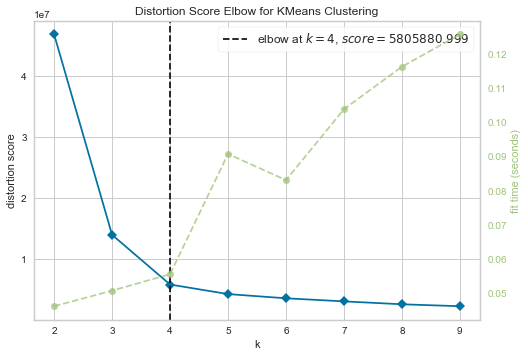

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
#Elbow Curve
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(df)
visualizer.show()  

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

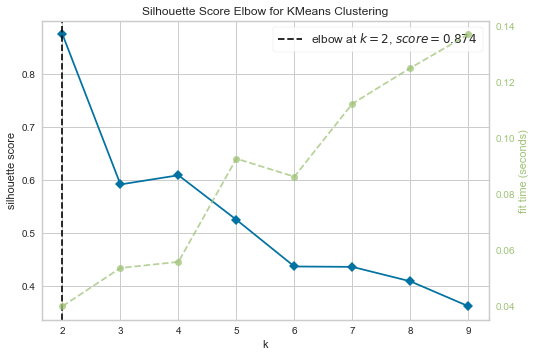

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df)
visualizer.show()  

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

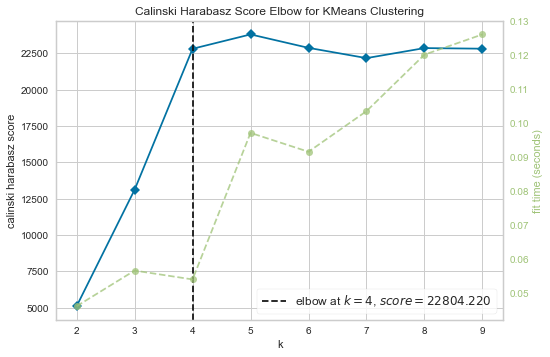

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10
                                       ),metric='calinski_harabasz', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

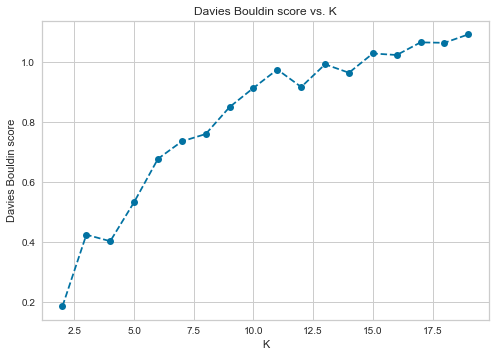

In [44]:
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(df)
    score = davies_bouldin_score(df, model)
    
    return score
scores = []
centers = list(range(2,20))
for center in centers:
    scores.append(get_kmeans_score(df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

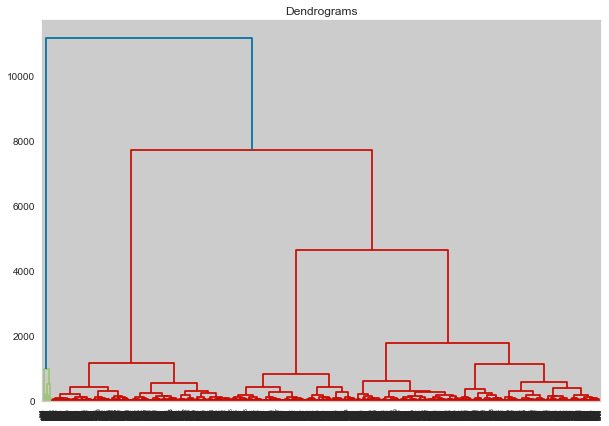

In [54]:
# Dendogram for Heirarchical Clustering

pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [47]:
X=df
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(X)
kmeans_labels = kmeans.predict(X)
print("Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))
print("Silhouette Score:", silhouette_score(X, kmeans_labels))

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 0.4019500055909108
Silhouette Score: 0.6087398963007942


In [48]:
X=df
ms = MeanShift().fit(X)
ms_labels = ms.labels_
n_clusters_ = len(set(ms_labels))
print("Number of clusters:", n_clusters_)

silhouette_avg = silhouette_score(X, ms_labels)
print("Silhouette score:", silhouette_avg)
db_score = davies_bouldin_score(X, ms_labels)
print("Davies-Bouldin score:", db_score)

Number of clusters: 4
Silhouette score: 0.8673598558623916
Davies-Bouldin score: 0.43513224359703806


In [49]:
X=df
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg.fit(X)
agg_labels = agg.labels_
silhouette_avg = silhouette_score(X, agg_labels)
print("Silhouette score:", silhouette_avg)
db_score = davies_bouldin_score(X, agg_labels)
print("Davies-Bouldin score:", db_score)

Silhouette score: 0.5880398367328602
Davies-Bouldin score: 0.4056846843858817


In [50]:
X=df
spectral = SpectralClustering(n_clusters=4
                              , affinity='nearest_neighbors', n_neighbors=10)
spectral.fit(X)
spectral_labels = spectral.labels_
print("Silhouette score:",  silhouette_score(X, spectral_labels))
print("Davies-Bouldin score:", davies_bouldin_score(X, spectral_labels))

G:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette score: 0.6059248817745929
Davies-Bouldin score: 0.4014006114350412


In [51]:
X=df
optics = OPTICS(min_samples=4)
optics.fit(X)
optics_labels = optics.labels_

print("Davies-Bouldin score:", davies_bouldin_score(X, optics_labels))
print("Silhouette score:", silhouette_score(X, optics_labels))

Davies-Bouldin score: 1.870064416389325
Silhouette score: -0.5612942544980799


In [52]:
X=df
birch = Birch(n_clusters=4)
birch.fit(X)
birch_labels = birch.predict(X)
db_score = davies_bouldin_score(X, birch_labels)
silhouette_avg = silhouette_score(X, birch_labels)
print("Davies-Bouldin Score: ", db_score)
print("Silhouette Score: ", silhouette_avg)

Davies-Bouldin Score:  0.4056846843858817
Silhouette Score:  0.5880398367328602


In [24]:
#Ensemble Construction

In [53]:
ensembling_labels = np.array([])
for i in range(len(X)):
    labels = [ms_labels[i],birch_labels[i]]
    ensembling_labels=np.append(ensembling_labels,mode(labels)[0])
print("Davies-Bouldin Score: ",davies_bouldin_score(X, ensembling_labels))
print("Silhouette Score:", silhouette_score(X, ensembling_labels))

Davies-Bouldin Score:  0.18469459745391353
Silhouette Score: 0.8737063980122016
